In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


**Load the dataset**

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

print('X_train.shape', X_train.shape)

X_train.shape (60000, 28, 28)


In [ ]:
#Build the model
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
# compile the model

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#train the model

r = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2999 - accuracy: 0.9134 - val_loss: 0.1485 - val_accuracy: 0.9539
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1465 - accuracy: 0.9568 - val_loss: 0.1124 - val_accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1092 - accuracy: 0.9663 - val_loss: 0.0898 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9729 - val_loss: 0.0744 - val_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0744 - accuracy: 0.9775 - val_loss: 0.0745 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9794 - val_loss: 0.0750 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9810 - val_loss: 0.0699 - val_accuracy:

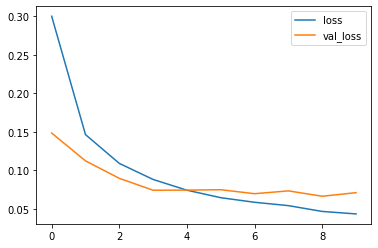

In [ ]:
#plot loss per iteration 

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

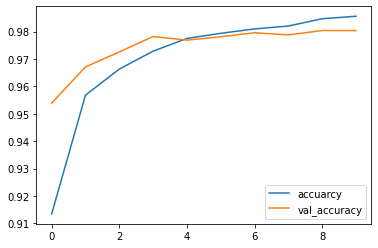

In [ ]:
#plot accuarcy per iteration 

plt.plot(r.history['accuracy'], label = 'accuarcy')
plt.plot(r.history['val_accuracy'], label ='val_accuracy')
plt.legend()

In [ ]:
#Evaluate the model

print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9804
[0.0712045207619667, 0.980400025844574]


In [ ]:
import numpy as np


true label is 7 predicted is 1


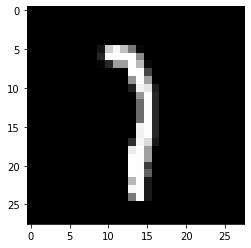

In [ ]:
p_test = model.predict(X_test).argmax(axis=1)
miss_idx = np.where(p_test !=y_test)[0]
i = np.random.choice(miss_idx)
plt.imshow(X_test[i],cmap='gray')
print('true label is {} predicted is {}'.format(y_test[i],p_test[i]))